# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит домашнее задание - оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [3]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

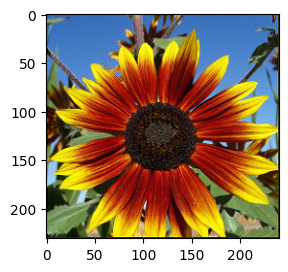

In [5]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

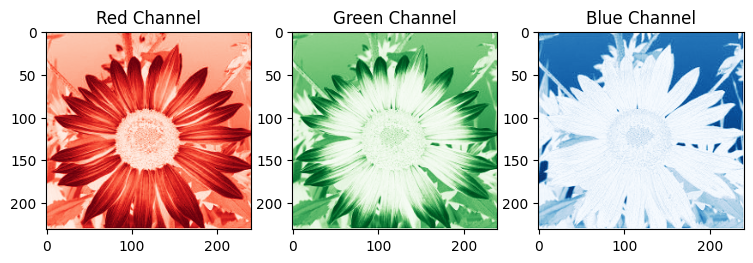

In [6]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

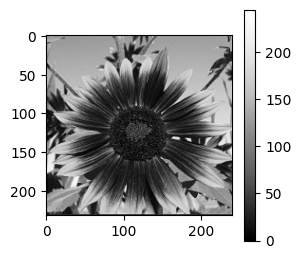

In [8]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:** Смотря что мы имеем в виду под черно-белым изображением. Если брать среднее значение интенсивностей, то изображение будет черно-белым, но возможно оно будет не таким контрастным, как хотелось бы.

## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:** В данном случае `cmap='Greys_r'` используется для отображения изображения в обратном порядке, то есть черный цвет будет наименьшим значением интенсивности, а белый - наибольшим, то есть приставка `r` в названии означает `reversed`.

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [9]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

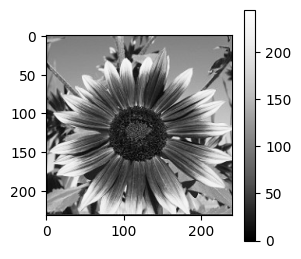

In [10]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [11]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [12]:
def convert_rgb_to_grayscale(img_rgb):
    img_gray = 0.299 * img_rgb[:, :, 0] + 0.587 * img_rgb[:, :, 1] + 0.114 * img_rgb[:, :, 2]
    return np.rint(img_gray).astype(np.uint8) 

In [13]:
assert(np.allclose(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY), convert_rgb_to_grayscale(img_rgb), atol=1))

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

In [14]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

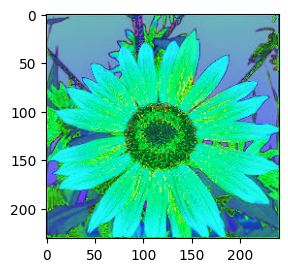

In [15]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

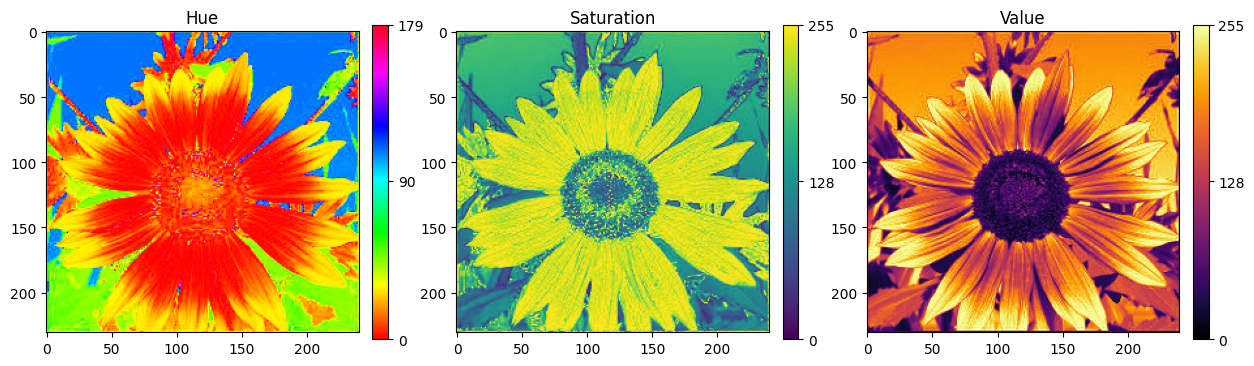

In [16]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

In [17]:
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

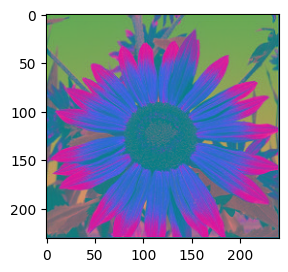

In [18]:
plt.figure(figsize=[3, 3])
plt.imshow(img_yuv);

/tmp/ipykernel_5446/235402478.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar2.ax.set_yticklabels(['-128', '0', '128'])
/tmp/ipykernel_5446/235402478.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar3.ax.set_yticklabels(['-128', '0', '128'])


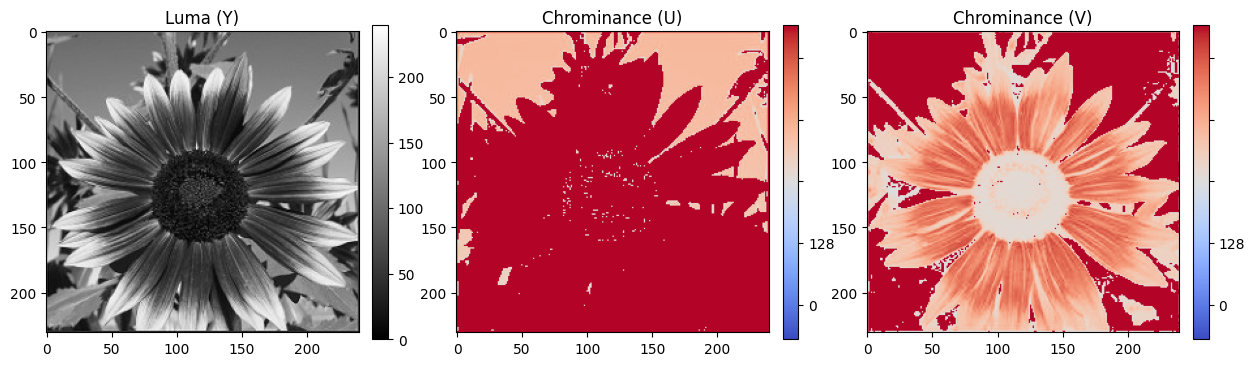

In [19]:
y, u, v = cv2.split(img_yuv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

# Y (яркость) - используем серую палитру
im1 = axs[0].imshow(y, cmap="gray")
axs[0].set_title('Luma (Y)')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

# U (цветоразностный) - сдвигаем к диапазону [-128, 127]
im2 = axs[1].imshow(u - 128, cmap="coolwarm", vmin=-128, vmax=127)
axs[1].set_title('Chrominance (U)')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)
cbar2.ax.set_yticklabels(['-128', '0', '128'])

# V (цветоразностный) - аналогично U
im3 = axs[2].imshow(v - 128, cmap="coolwarm", vmin=-128, vmax=127)
axs[2].set_title('Chrominance (V)')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04)
cbar3.ax.set_yticklabels(['-128', '0', '128'])

plt.show()

In [20]:
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

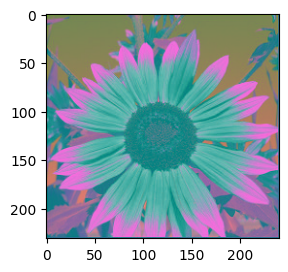

In [21]:
plt.figure(figsize=[3, 3])
plt.imshow(img_lab);

/tmp/ipykernel_5446/3675380674.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar2.ax.set_yticklabels(['-128', '0', '128'])
/tmp/ipykernel_5446/3675380674.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar3.ax.set_yticklabels(['-128', '0', '128'])


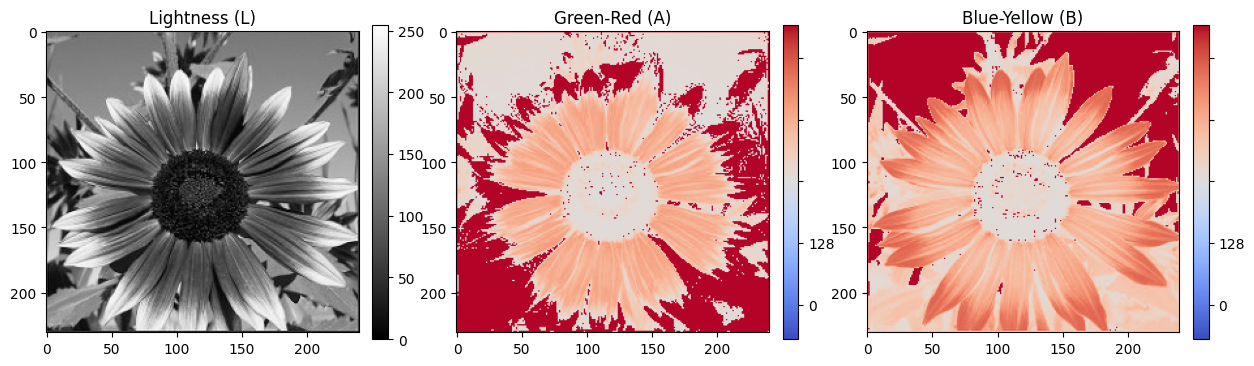

In [22]:
l, a, b = cv2.split(img_lab)

# Создаем графики
fig, axs = plt.subplots(1, 3, figsize=[15, 5])

# L (яркость) - используем серую палитру
im1 = axs[0].imshow(l, cmap="gray", vmin=0, vmax=255)
axs[0].set_title('Lightness (L)')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

# A (зеленый-красный) - сдвигаем диапазон
im2 = axs[1].imshow(a - 128, cmap="coolwarm", vmin=-128, vmax=127)
axs[1].set_title('Green-Red (A)')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)
cbar2.ax.set_yticklabels(['-128', '0', '128'])

# B (синий-желтый) - сдвигаем диапазон
im3 = axs[2].imshow(b - 128, cmap="coolwarm", vmin=-128, vmax=127)
axs[2].set_title('Blue-Yellow (B)')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04)
cbar3.ax.set_yticklabels(['-128', '0', '128'])

plt.show()

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** В задачах, когда нам не важен цвет, например в задаче распознания человека по лицу (нам не важны такие факторы как тени или пересветы, цвет тоже может что-то значить, но от него лучше избавиться) ну или где нам наоборот нужно сконцентрироваться на другой информации, которую нам может передать изображени, например на глубине

# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [23]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [24]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [25]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

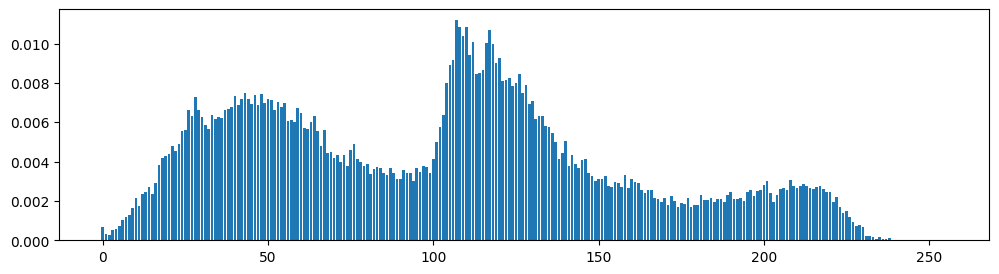

In [26]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [27]:
def compute_hist(channel):
    hist, _ = np.histogram(channel, bins=256, range=(0, 255))
    return hist

In [28]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

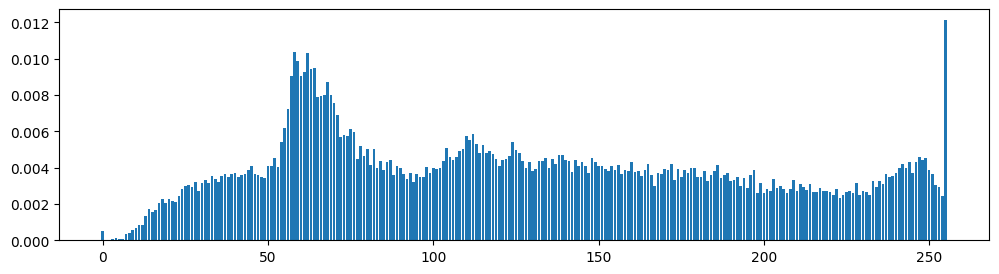

In [29]:
visualize_hist(hist_r)

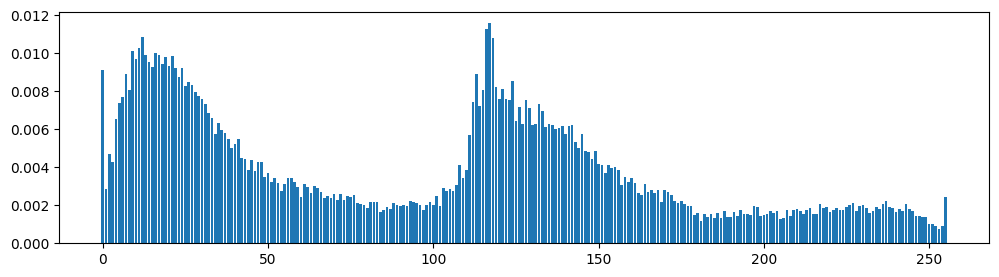

In [30]:
visualize_hist(hist_g)

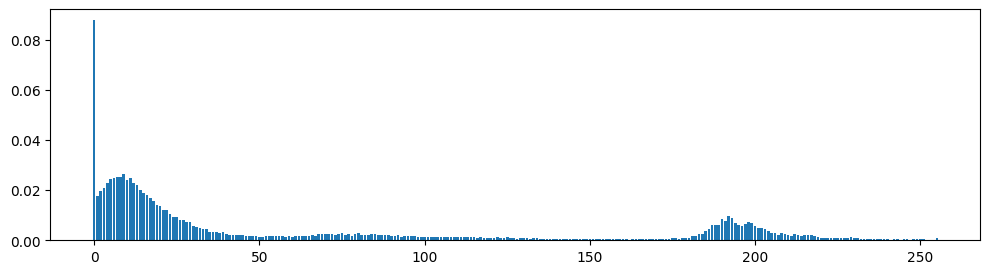

In [31]:
visualize_hist(hist_b)

In [32]:
assert((hist_gray == hist_cv).all())

## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:** Можно точно сказать каким изображение будет - ярким или темным. Также можно по выбросам (высокие столбцы) понять какие значения интенсивности чаще всего встречаются в изображении, что может говорить пересвете

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:**

1)смена камеры - если мы имеем ввиду передвижение камеры по сцене, то гистограмма будет постепенно меняться, так как меняется освещение и направление света. Также все зависит от нового освещения и новых объектов на сцене.
2)смена освещения - гистограмма будет ходить волной тк в кадре объекты не меняются, а меняется освещение.
3)смена сцены - гистограмма резко сменится тк это совершенно другой кадр с новыми объектами и новым освещением.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

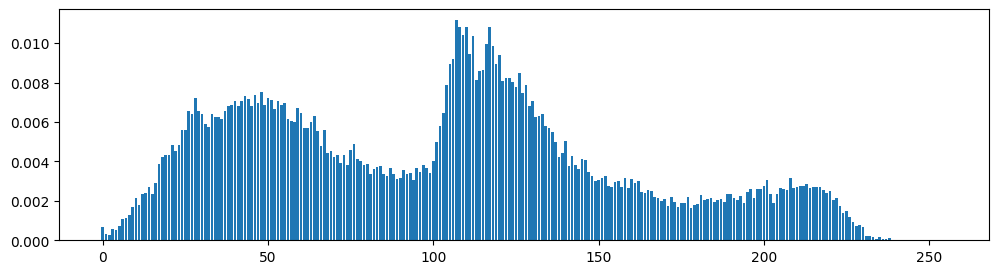

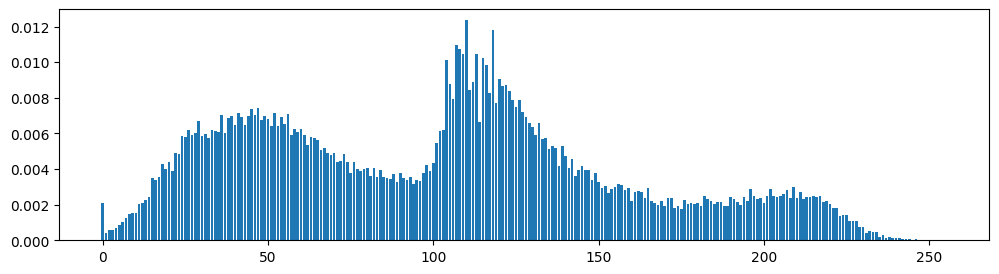

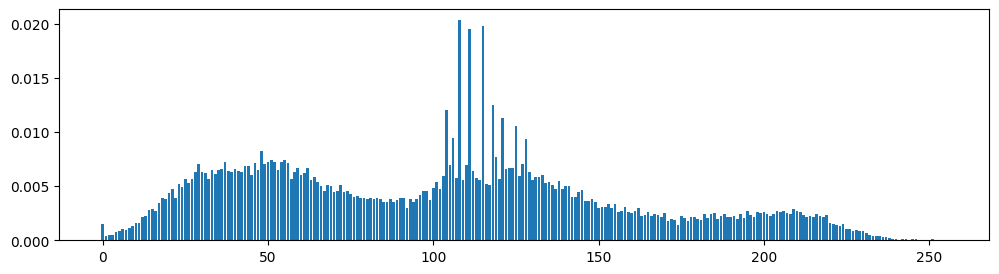

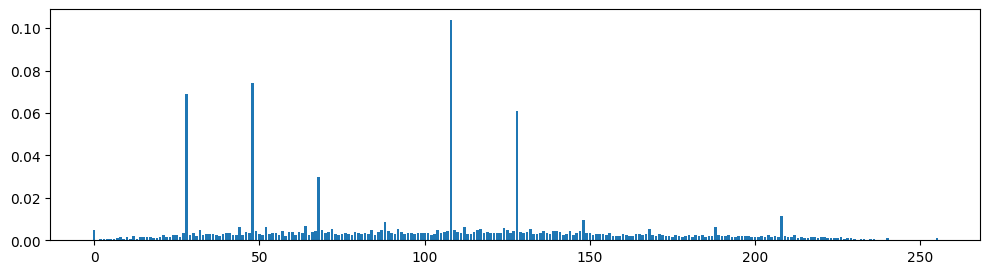

In [33]:
qualities = [90, 60, 30, 5]
compressed_images = []

for q in qualities:
    _, buffer = cv2.imencode(".jpg", img_gray, [cv2.IMWRITE_JPEG_QUALITY, q])
    img_compressed = cv2.imdecode(buffer, cv2.IMREAD_GRAYSCALE)
    compressed_images.append((q, img_compressed))

# Визуализация гистограмм
for q, img in compressed_images:
    hist = compute_hist(img)
    visualize_hist(hist)

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

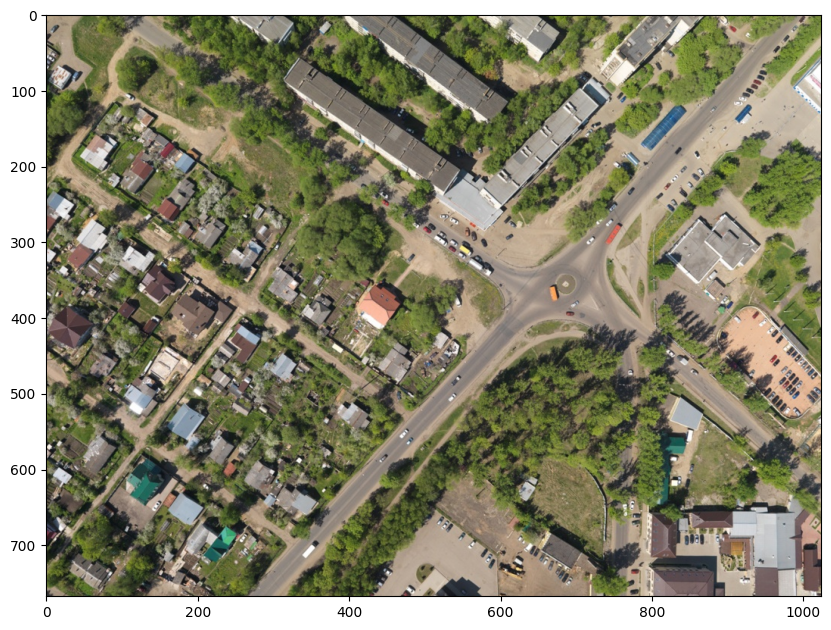

In [34]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

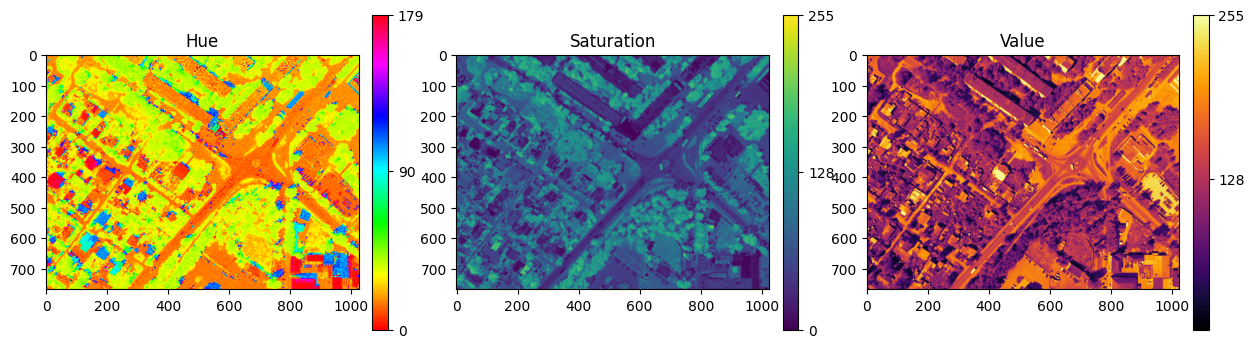

In [35]:
aerial_image_hsv = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(aerial_image_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

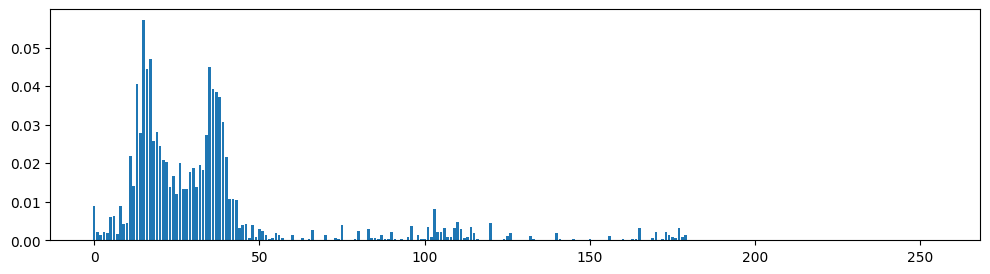

In [38]:
hist = compute_hist(h)
visualize_hist(hist)

Text(0.5, 1.0, 'Mask')

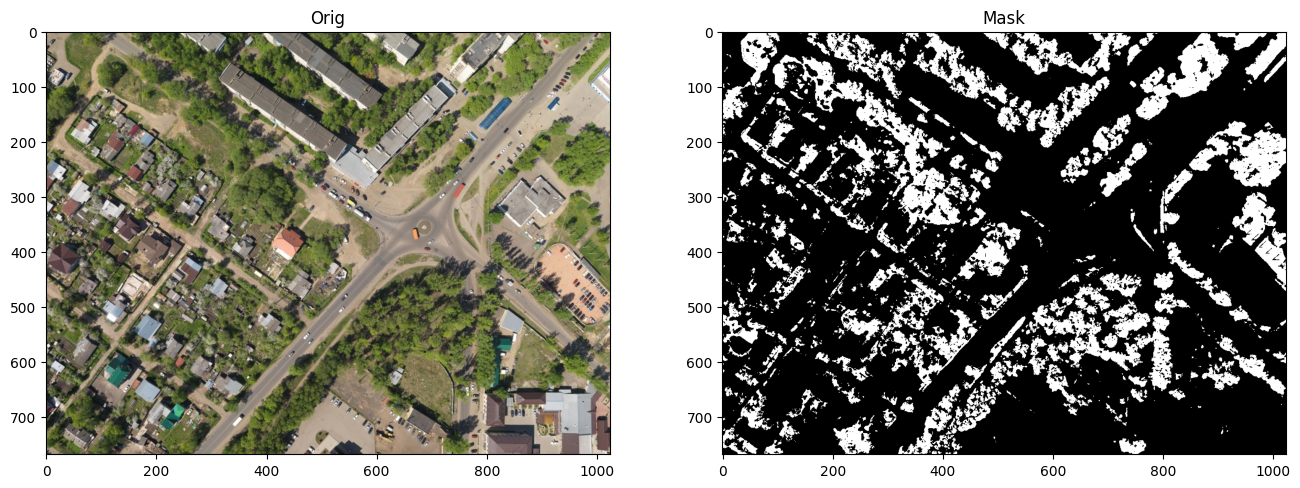

In [48]:
mask = cv2.inRange(aerial_image_hsv, np.array([30, 80, 80]) , np.array([70, 255, 255]))

plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.imshow(aerial_image)
plt.title("Orig")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")

# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [52]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений
        self.img = img
        h, w = img.shape
        self.padded_img = np.zeros((h + 1, w + 1), dtype=np.int64)
        for i in range(1, h + 1):
            for j in range(1, w + 1):
                self.padded_img[i, j] += img[i - 1, j - 1] + self.padded_img[i - 1, j] + self.padded_img[i, j - 1] - self.padded_img[i - 1, j - 1]

    def sum(self, x, y, w, h):
        return self.padded_img[y + h, x + w] - self.padded_img[y, x + w] - self.padded_img[y + h, x] + self.padded_img[y, x]

In [53]:
I = IntegralImage(img_gray)

In [57]:
img_gray

array([[117, 112, 117, ..., 117, 124,  79],
       [121,  93,  91, ..., 111, 118,  58],
       [131,  94, 100, ..., 115, 126,  59],
       ...,
       [128,  10,  35, ..., 130, 150,  56],
       [136,   6,  17, ..., 151, 163,  74],
       [ 88,  36,  53, ...,  38,  50,  24]], dtype=uint8)

In [56]:
I.padded_img

array([[      0,       0,       0, ...,       0,       0,       0],
       [      0,     117,     229, ...,   27924,   28048,   28127],
       [      0,     238,     443, ...,   51367,   51609,   51746],
       ...,
       [      0,   29013,   48223, ..., 5544431, 5569087, 5582504],
       [      0,   29149,   48365, ..., 5577481, 5602300, 5615791],
       [      0,   29237,   48489, ..., 5587391, 5612260, 5625775]])

In [54]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** Интегральное изображение могло бы быть полезным в задачах детекции или по крайней мере в ситуациях, когда отслежуемый объект движется

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** Динамическому программированию